In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import random
import warnings

warnings.filterwarnings(action='ignore')

In [180]:
train_data = pd.read_csv('/content/train_modified.csv')
test_data = pd.read_csv('/content/test_edit.csv')

In [181]:
# Drop unused column
# train_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.drop('Unnamed: 0', axis=1, inplace=True)

In [182]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       10000 non-null  int64  
 1   Sex             10000 non-null  object 
 2   Race            10000 non-null  object 
 3   Housing         10000 non-null  object 
 4   Delay           10000 non-null  object 
 5   Anhedonia       10000 non-null  float64
 6   DepMood         10000 non-null  float64
 7   Sleep           10000 non-null  float64
 8   Tired           10000 non-null  float64
 9   Appetite        10000 non-null  float64
 10  Rumination      10000 non-null  float64
 11  Concentration   10000 non-null  float64
 12  Psychomotor     10000 non-null  float64
 13  Delusion        9516 non-null   float64
 14  Suspicious      10000 non-null  float64
 15  Withdrawal      9461 non-null   float64
 16  Passive         10000 non-null  float64
 17  Tension         10000 non-null  

In [183]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       1000 non-null   int64  
 1   Sex             1000 non-null   object 
 2   Race            1000 non-null   object 
 3   Housing         1000 non-null   object 
 4   Delay           1000 non-null   object 
 5   Anhedonia       1000 non-null   float64
 6   DepMood         1000 non-null   float64
 7   Sleep           1000 non-null   float64
 8   Tired           1000 non-null   float64
 9   Appetite        1000 non-null   float64
 10  Rumination      1000 non-null   float64
 11  Concentration   1000 non-null   float64
 12  Psychomotor     1000 non-null   float64
 13  Delusion        1000 non-null   float64
 14  Suspicious      1000 non-null   float64
 15  Withdrawal      1000 non-null   float64
 16  Passive         1000 non-null   float64
 17  Tension         1000 non-null   fl

In [184]:
train_data['Sex'] = train_data['Sex'].map({'Male' : 0, 'Female' : 1})
train_data['Race'] = train_data['Race'].map({'Asian' : 0, 'Hispanic' : 1, 'Black' : 2, 'White' : 3})
train_data['Housing'] = train_data['Housing'].map({'Unstable' : 0, 'Stable' : 1})
train_data['Delay'] = train_data['Delay'].map({'No' : 0, 'Yes' : 1})

test_data['Sex'] = test_data['Sex'].map({'Male' : 0, 'Female' : 1})
test_data['Race'] = test_data['Race'].map({'Asian' : 0, 'Hispanic' : 1, 'Black' : 2, 'White' : 3})
test_data['Housing'] = test_data['Housing'].map({'Unstable' : 0, 'Stable' : 1})
test_data['Delay'] = test_data['Delay'].map({'No' : 0, 'Yes' : 1})

In [185]:
train_data['Is_Black'] = train_data['Race']
test_data['Is_Black'] = test_data['Race']

black = [2]
non_black = [0, 1, 3]

for each in black:
    train_data['Is_Black'] = train_data['Is_Black'].replace(each, '1')
    test_data['Is_Black'] = test_data['Is_Black'].replace(each, '1')

for each in non_black:
    train_data['Is_Black'] = train_data['Is_Black'].replace(each, '0')
    test_data['Is_Black'] = test_data['Is_Black'].replace(each, '0')

train_data['Is_Black'] = train_data['Is_Black'].astype(np.int64)
test_data['Is_Black'] = test_data['Is_Black'].astype(np.int64)

In [186]:
train_data.drop(columns = ['Race'], inplace = True)
train_data.drop(columns = ['Sleep'], inplace = True)
train_data.drop(columns = ['Appetite'], inplace = True)
train_data.drop(columns = ['Passive'], inplace = True)
train_data.drop(columns = ['Income'], inplace = True)

test_data.drop(columns = ['Race'], inplace = True)
test_data.drop(columns = ['Sleep'], inplace = True)
test_data.drop(columns = ['Appetite'], inplace = True)
test_data.drop(columns = ['Passive'], inplace = True)
test_data.drop(columns = ['Income'], inplace = True)

In [187]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       10000 non-null  int64  
 1   Sex             10000 non-null  int64  
 2   Housing         10000 non-null  int64  
 3   Delay           10000 non-null  int64  
 4   Anhedonia       10000 non-null  float64
 5   DepMood         10000 non-null  float64
 6   Tired           10000 non-null  float64
 7   Rumination      10000 non-null  float64
 8   Concentration   10000 non-null  float64
 9   Psychomotor     10000 non-null  float64
 10  Delusion        9516 non-null   float64
 11  Suspicious      10000 non-null  float64
 12  Withdrawal      9461 non-null   float64
 13  Tension         10000 non-null  float64
 14  UnusualThought  10000 non-null  float64
 15  Is_Black        10000 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 1.2 MB


In [188]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       1000 non-null   int64  
 1   Sex             1000 non-null   int64  
 2   Housing         1000 non-null   int64  
 3   Delay           1000 non-null   int64  
 4   Anhedonia       1000 non-null   float64
 5   DepMood         1000 non-null   float64
 6   Tired           1000 non-null   float64
 7   Rumination      1000 non-null   float64
 8   Concentration   1000 non-null   float64
 9   Psychomotor     1000 non-null   float64
 10  Delusion        1000 non-null   float64
 11  Suspicious      1000 non-null   float64
 12  Withdrawal      1000 non-null   float64
 13  Tension         1000 non-null   float64
 14  UnusualThought  1000 non-null   float64
 15  Is_Black        1000 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 125.1 KB


train_data의 결측치(Delusion, Withdrawal)를 평균값으로 대체

In [189]:
train_data['Delusion'] = train_data['Delusion'].fillna(train_data['Delusion'].mean())
train_data['Withdrawal'] = train_data['Withdrawal'].fillna(train_data['Withdrawal'].mean())

In [190]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       10000 non-null  int64  
 1   Sex             10000 non-null  int64  
 2   Housing         10000 non-null  int64  
 3   Delay           10000 non-null  int64  
 4   Anhedonia       10000 non-null  float64
 5   DepMood         10000 non-null  float64
 6   Tired           10000 non-null  float64
 7   Rumination      10000 non-null  float64
 8   Concentration   10000 non-null  float64
 9   Psychomotor     10000 non-null  float64
 10  Delusion        10000 non-null  float64
 11  Suspicious      10000 non-null  float64
 12  Withdrawal      10000 non-null  float64
 13  Tension         10000 non-null  float64
 14  UnusualThought  10000 non-null  float64
 15  Is_Black        10000 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 1.2 MB


In [191]:
train_data['Psych_Stress'] = (train_data['Delusion'] + train_data['UnusualThought'] -  train_data['Rumination'])
train_data['Psych_Stress'] = train_data['Psych_Stress'].round(1)

test_data['Psych_Stress'] = (test_data['Delusion'] + test_data['UnusualThought'] -  test_data['Rumination'])
test_data['Psych_Stress'] = test_data['Psych_Stress'].round(1)

In [192]:
train_data.head()

,Diagnosis,Sex,Housing,Delay,Anhedonia,DepMood,Tired,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Tension,UnusualThought,Is_Black,Psych_Stress
0,1,0,1,0,5.776834,7.945197,5.821416,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,6.763654,1.165049,0,-1.3
1,0,0,1,0,7.298161,8.605159,6.657438,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,3.009537,1.635291,0,-1.0
2,1,1,0,0,5.478631,6.581001,5.759076,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,6.689860,3.030685,1,2.1
3,0,1,1,1,7.440324,6.482757,5.483178,7.980671,6.172174,6.222733,3.657648,2.413774,3.979344,6.749632,1.548987,1,-2.8
4,1,0,1,1,7.655051,6.159573,5.310127,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,6.034795,3.502844,0,3.5


In [193]:
test_data.head()

,Diagnosis,Sex,Housing,Delay,Anhedonia,DepMood,Tired,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Tension,UnusualThought,Is_Black,Psych_Stress
0,1,0,1,1,6.532957,6.662940,5.082433,2.933780,7.142030,4.734500,2.773761,3.559530,5.486171,6.603999,1.194969,0,1.0
1,1,1,1,0,4.696685,8.437778,4.711261,5.551996,7.102520,3.822138,2.001125,3.027988,1.383793,6.080530,2.287655,0,-1.3
2,0,1,1,1,8.782816,7.908974,4.356265,7.061972,7.497020,4.967228,1.925978,1.103069,4.424148,6.053067,1.163207,1,-4.0
3,1,0,1,1,5.511104,5.899826,2.366412,3.576740,5.655202,6.674195,4.342724,3.159770,5.193405,6.499117,3.798262,0,4.6
4,0,1,1,1,7.589003,9.643284,5.501671,9.205154,5.149195,3.996624,1.746914,1.737649,4.737726,4.190474,2.840198,0,-4.6


In [194]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       10000 non-null  int64  
 1   Sex             10000 non-null  int64  
 2   Housing         10000 non-null  int64  
 3   Delay           10000 non-null  int64  
 4   Anhedonia       10000 non-null  float64
 5   DepMood         10000 non-null  float64
 6   Tired           10000 non-null  float64
 7   Rumination      10000 non-null  float64
 8   Concentration   10000 non-null  float64
 9   Psychomotor     10000 non-null  float64
 10  Delusion        10000 non-null  float64
 11  Suspicious      10000 non-null  float64
 12  Withdrawal      10000 non-null  float64
 13  Tension         10000 non-null  float64
 14  UnusualThought  10000 non-null  float64
 15  Is_Black        10000 non-null  int64  
 16  Psych_Stress    10000 non-null  float64
dtypes: float64(12), int64(5)
memory 

In [195]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       1000 non-null   int64  
 1   Sex             1000 non-null   int64  
 2   Housing         1000 non-null   int64  
 3   Delay           1000 non-null   int64  
 4   Anhedonia       1000 non-null   float64
 5   DepMood         1000 non-null   float64
 6   Tired           1000 non-null   float64
 7   Rumination      1000 non-null   float64
 8   Concentration   1000 non-null   float64
 9   Psychomotor     1000 non-null   float64
 10  Delusion        1000 non-null   float64
 11  Suspicious      1000 non-null   float64
 12  Withdrawal      1000 non-null   float64
 13  Tension         1000 non-null   float64
 14  UnusualThought  1000 non-null   float64
 15  Is_Black        1000 non-null   int64  
 16  Psych_Stress    1000 non-null   float64
dtypes: float64(12), int64(5)
memory us

Isolation Forest를 활용한 이상치 확인

In [196]:
# Combine train_data and test_data
data = pd.concat([train_data, test_data], axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       11000 non-null  int64  
 1   Sex             11000 non-null  int64  
 2   Housing         11000 non-null  int64  
 3   Delay           11000 non-null  int64  
 4   Anhedonia       11000 non-null  float64
 5   DepMood         11000 non-null  float64
 6   Tired           11000 non-null  float64
 7   Rumination      11000 non-null  float64
 8   Concentration   11000 non-null  float64
 9   Psychomotor     11000 non-null  float64
 10  Delusion        11000 non-null  float64
 11  Suspicious      11000 non-null  float64
 12  Withdrawal      11000 non-null  float64
 13  Tension         11000 non-null  float64
 14  UnusualThought  11000 non-null  float64
 15  Is_Black        11000 non-null  int64  
 16  Psych_Stress    11000 non-null  float64
dtypes: float64(12), int64(5)
memory u

In [197]:
# Use isolation forest method to find outliers
clf = IsolationForest(random_state=42)

In [198]:
mytrain = data[:10000]
mytest = data[10000:]
print(len(mytrain))
print(len(mytest))

10000
1000


In [199]:
# 1. Psych_Stress 포함한 이상치 탐지 (17개의 column을 모두 포함)
pred1 = clf.fit_predict(data)
print('Number of nonoutliers:', len(data[pred1 == 1]))  # 1: nonoutlier
print('Number of outliers:', len(data[pred1 != 1]))     # -1:outlier

mytrain_pred1 = pred1[:10000]
mytest_pred1 = pred1[10000:]

removed_train1 = mytrain[mytrain_pred1 == 1]
removed_test1 = mytest[mytest_pred1 == 1]

print(len(removed_train1))
print(len(removed_test1))

removed_train1.to_csv('/content/removed_train1.csv', index=False)
removed_test1.to_csv('/content/removed_test1.csv', index=False)

Number of nonoutliers: 8318
Number of outliers: 2682
7635
683


In [200]:
# 2. Psych_Stress 제외한 이상치 탐지 (16개의 column 포함)
mycolumns2 = ['Diagnosis', 'Sex', 'Housing', 'Delay', 'Anhedonia', 'DepMood', 'Tired', 'Rumination',
             'Concentration', 'Psychomotor', 'Delusion', 'Suspicious', 'Withdrawal', 'Tension',
             'UnusualThought', 'Is_Black']  # 총 17개의 column 중 Psych_Stress만 제외

pred2 = clf.fit_predict(data[mycolumns2])
print('Number of nonoutliers:', len(data[pred2 == 1]))   # 1: nonoutlier
print('Number of outliers:', len(data[pred2 != 1]))      # -1:outlier

mytrain_pred2 = pred2[:10000]
mytest_pred2 = pred2[10000:]

removed_train2 = mytrain[mytrain_pred2 == 1]
removed_test2 = mytest[mytest_pred2 == 1]

print(len(removed_train2))
print(len(removed_test2))

removed_train2.to_csv('/content/removed_train2.csv', index=False)
removed_test2.to_csv('/content/removed_test2.csv', index=False)

Number of nonoutliers: 8260
Number of outliers: 2740
7570
690


In [201]:
# 3. 연속형 숫자형 변수만 사용, Psych_Stress 포함한 이상치 탐지 (12개의 column 포함)
mycolumns3 = ['Anhedonia', 'DepMood', 'Tired', 'Rumination',
             'Concentration', 'Psychomotor', 'Delusion', 'Suspicious', 'Withdrawal', 'Tension',
             'UnusualThought', 'Psych_Stress']

pred3 = clf.fit_predict(data[mycolumns3])
print('Number of nonoutliers:', len(data[pred3 == 1]))   # 1: nonoutlier
print('Number of outliers:', len(data[pred3 != 1]))      # -1:outlier

mytrain_pred3 = pred3[:10000]
mytest_pred3 = pred3[10000:]

removed_train3 = mytrain[mytrain_pred3 == 1]
removed_test3 = mytest[mytest_pred3 == 1]

print(len(removed_train3))
print(len(removed_test3))

removed_train3.to_csv('/content/removed_train3.csv', index=False)
removed_test3.to_csv('/content/removed_test3.csv', index=False)

Number of nonoutliers: 9822
Number of outliers: 1178
8927
895


In [202]:
# 4. 연속형 숫자형 변수만 사용, Psych_Stress 제외한 이상치 탐지 (11개의 column 포함)
mycolumns4 = ['Anhedonia', 'DepMood', 'Tired', 'Rumination',
             'Concentration', 'Psychomotor', 'Delusion', 'Suspicious', 'Withdrawal', 'Tension',
             'UnusualThought']

pred4 = clf.fit_predict(data[mycolumns4])
print('Number of nonoutliers:', len(data[pred4 == 1]))   # 1: nonoutlier
print('Number of outliers:', len(data[pred4 != 1]))      # -1:outlier

mytrain_pred4 = pred4[:10000]
mytest_pred4 = pred4[10000:]

removed_train4 = mytrain[mytrain_pred4 == 1]
removed_test4 = mytest[mytest_pred4 == 1]

print(len(removed_train4))
print(len(removed_test4))

removed_train4.to_csv('/content/removed_train4.csv', index=False)
removed_test4.to_csv('/content/removed_test4.csv', index=False)

Number of nonoutliers: 9926
Number of outliers: 1074
9022
904


PCA를 활용한 이상치 분포 시각화

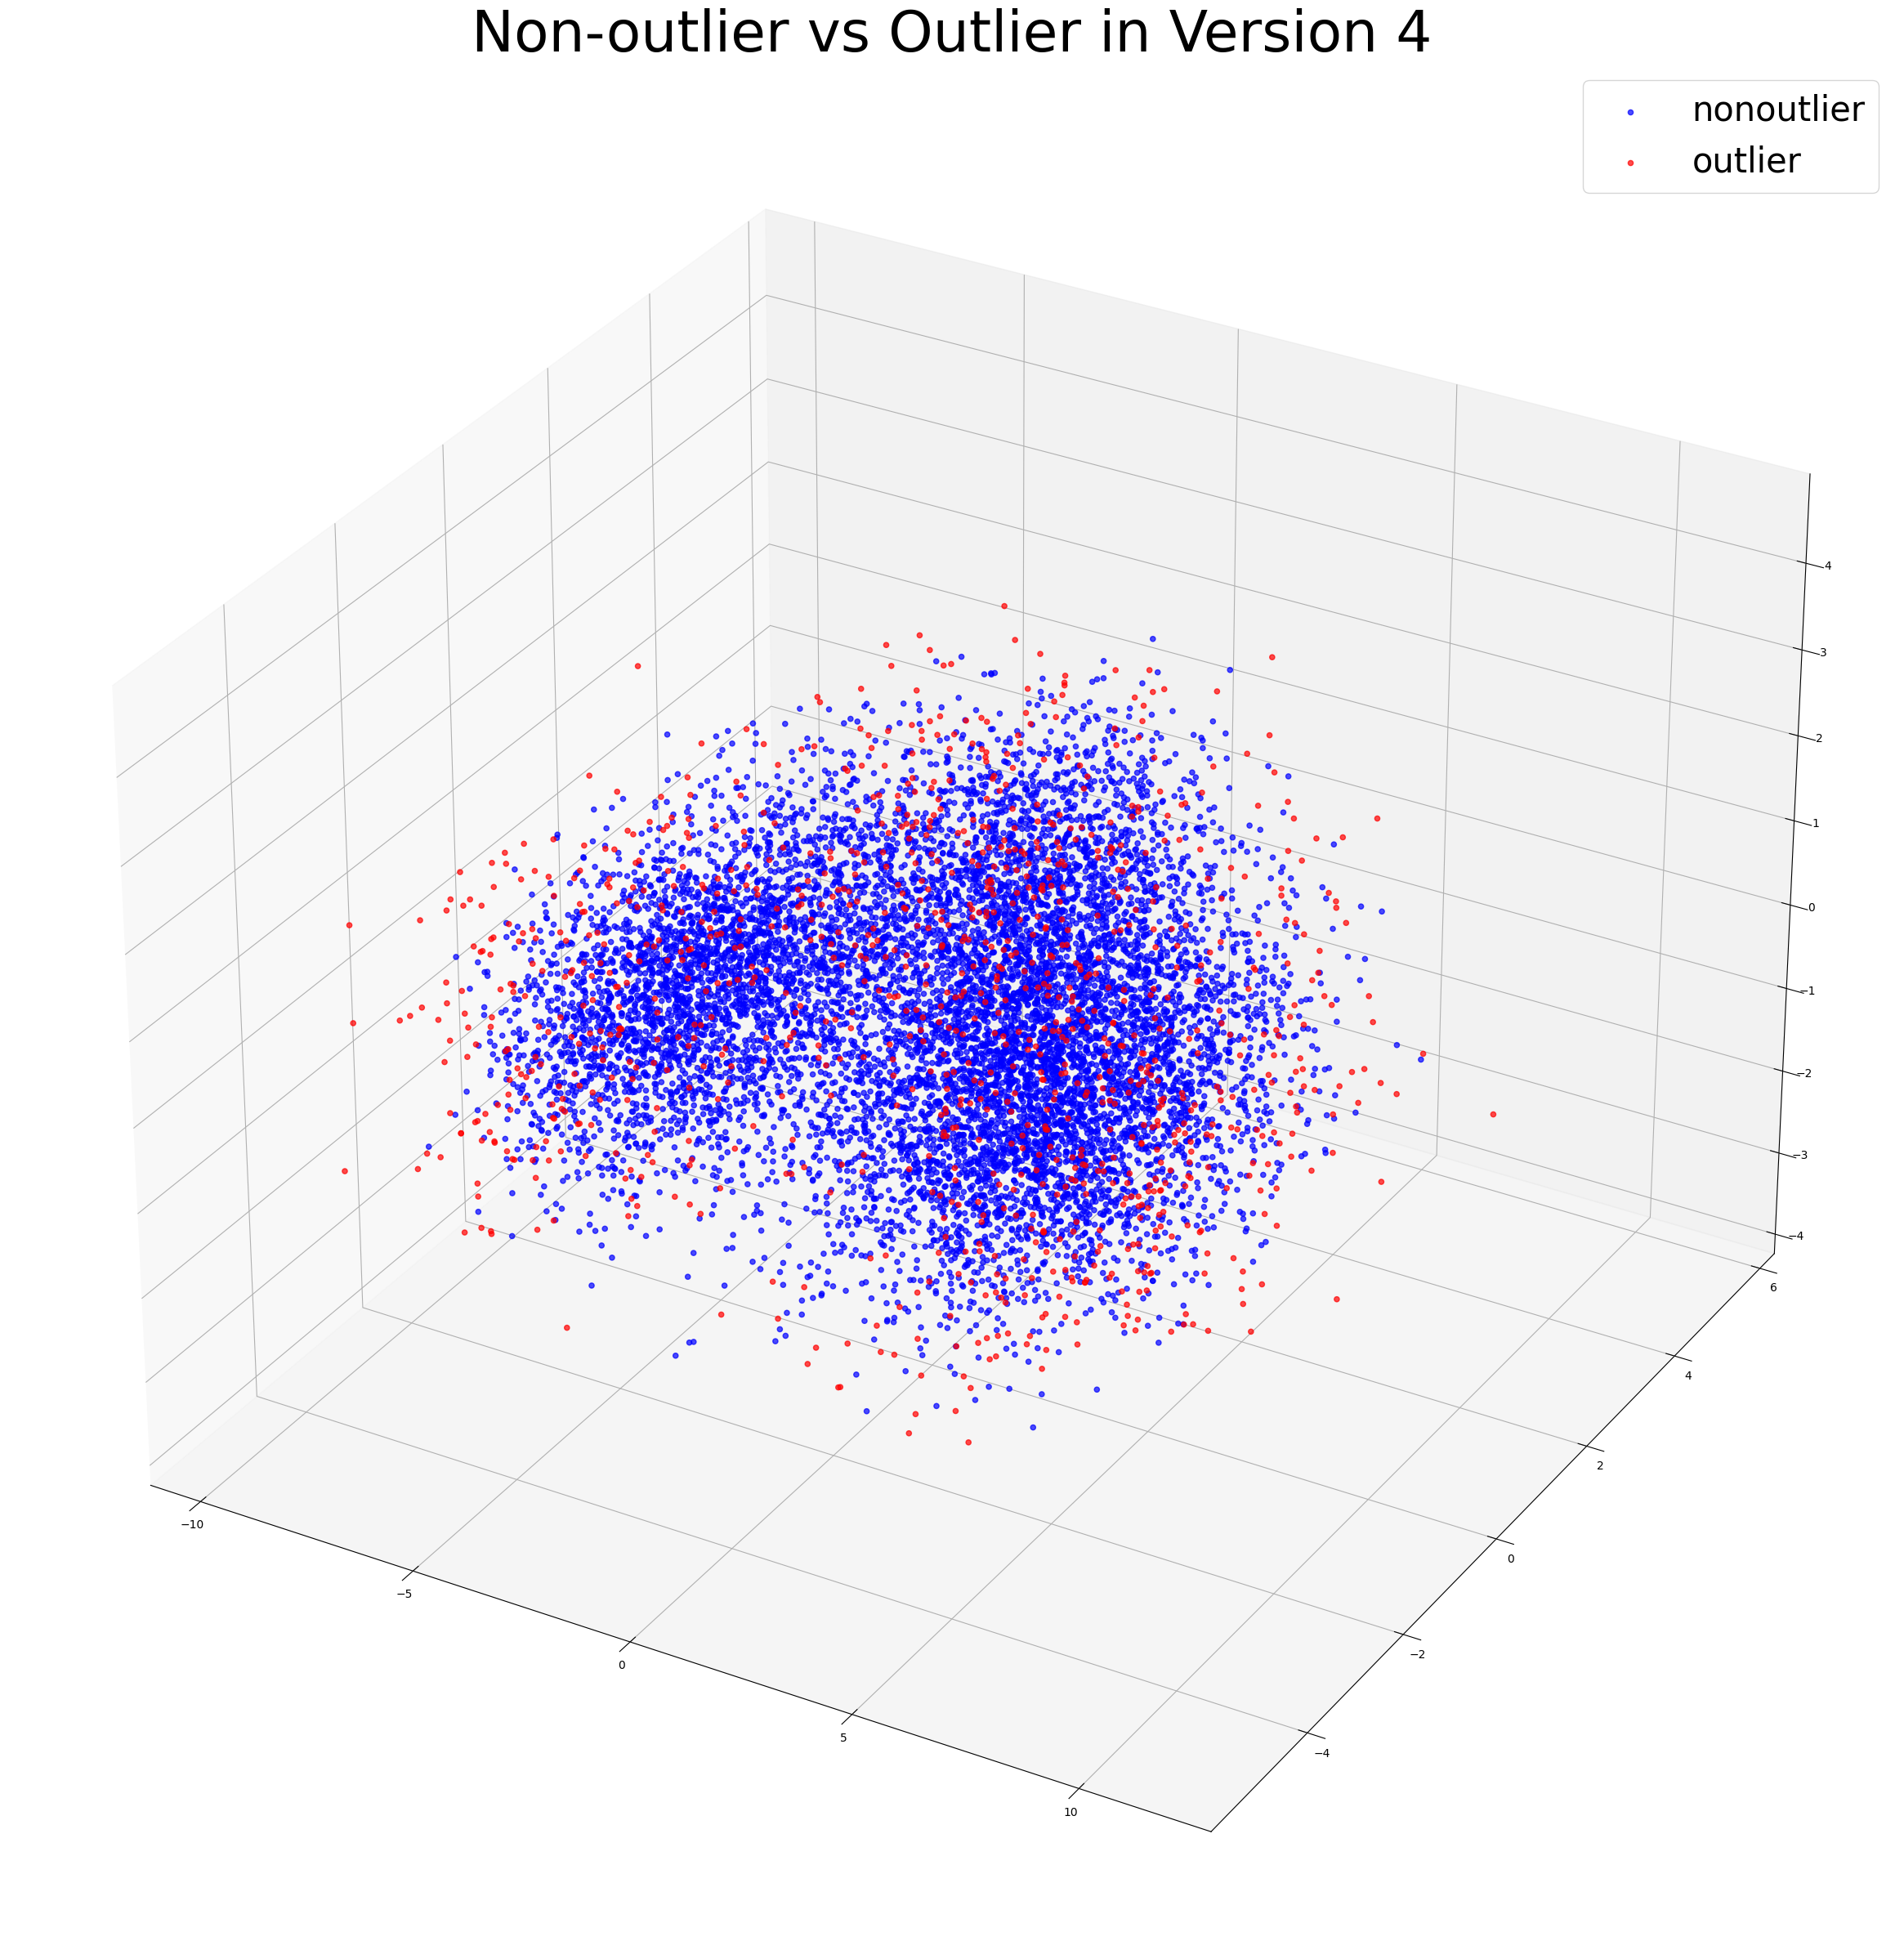

In [203]:
# Use PCA method to reduce dimension of data into 3
pca = PCA(n_components = 3)
pca_nonoutlier = pca.fit_transform(data[pred4 == 1])
pca_outlier = pca.fit_transform(data[pred4 != 1])

# Transform into dataframe
pca_nonoutlier = pd.DataFrame(pca_nonoutlier, columns=['component 0', 'component 1', 'component 2'])
pca_outlier = pd.DataFrame(pca_outlier, columns=['component 0', 'component 1', 'component 2'])

# Visualize the 3-dimensional data
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_nonoutlier['component 0'], pca_nonoutlier['component 1'], pca_nonoutlier['component 2'], color='blue', alpha=0.7, label='nonoutlier')
ax.scatter(pca_outlier['component 0'], pca_outlier['component 1'], pca_outlier['component 2'], color='red', alpha=0.7, label='outlier')
ax.legend(fontsize=30)
plt.title('Non-outlier vs Outlier in Version 4', fontsize=50)
plt.show()